# EDA: Weather Data
### Goal: Look at the [weather data]('../input/weather.csv') to do the following:
1. Clean the data (fill/remove nulls)
2. Understand purpose, area, and values
3. Discover trends
4. Visual important figures

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
weather = pd.read_csv('../data/weather.csv')

In [3]:
weather.shape

(2944, 22)

In [4]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


So there are two stations that seem to list nearly identical data. We could consider dropping a station entirely if it ends up being near duplicates.

Also, since we're dealing with date, we can cast that to `datetime` and set that as the index for easy data iteration.

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [6]:
weather['Date'] = pd.to_datetime(weather['Date'], infer_datetime_format=True)

In [7]:
weather.set_index(['Date'], inplace=True)

These columns `['Water1', 'Depart', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'SnowFall']` simply have too many missing values, and don't seem to add anything useful for the problem we're looking at. We've decided to drop these.

In [8]:
weather.drop(['Water1', 'Depart', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'SnowFall'], axis=1, inplace=True)

An issue we run into now, is that missing values are encoded as an `'M'`. First, we're going to check how many of those are duplicates

In [9]:
weather[weather.values=='M'].drop_duplicates().shape

(26, 14)

In [10]:
weather[weather.values=='M'].drop_duplicates().head()

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,
2007-05-04,2,78,51,M,42,50,M,M,0.00,29.36,30.04,10.1,7,10.4
2007-06-13,2,86,68,77,53,62,0,12,0.00,M,M,7.0,5,M
2007-06-28,2,73,61,67,56,61,0,2,M,29.43,30.07,12.2,2,13.3
2007-06-29,2,71,56,64,56,60,1,0,M,29.47,30.11,7.4,2,8.2
2008-07-08,2,86,46,M,68,71,M,M,0.28,29.16,29.80,7.4,24,8.3


There aren't too many, but for new, we'll keep them in. It's possible that, since they're missing, we can use station 2 to fill in those missing values.

But we do have an `'M'` in `Tavg`. And since that is a basic computation, we can manually calculate the value for that column. We'll start by setting it to `0`, cast that whole column to `int`, then compute the average.

In [11]:
weather.Tavg.replace("M", "0", inplace=True)

In [12]:
weather.Tavg = weather.Tavg.astype(int)

In [13]:
weather['Tavg'] = weather.apply(lambda row: 
                                (row['Tmax'] + row['Tmin'])/2 
                                if row['Tavg'] == 0 
                                else row['Tavg'], 1)

In [14]:
weather.head()

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,
2007-05-01,1,83,50,67.0,51,56,0,2,0.00,29.10,29.82,1.7,27,9.2
2007-05-01,2,84,52,68.0,51,57,0,3,0.00,29.18,29.82,2.7,25,9.6
2007-05-02,1,59,42,51.0,42,47,14,0,0.00,29.38,30.09,13.0,4,13.4
2007-05-02,2,60,43,52.0,42,47,13,0,0.00,29.44,30.08,13.3,2,13.4
2007-05-03,1,66,46,56.0,40,48,9,0,0.00,29.39,30.12,11.7,7,11.9


It seems like we have enough data to do some quick visuals. We want to check back on the differences between `Station_1` and `Station_2`. Is there a significant difference? Can we get rid of one entirely?

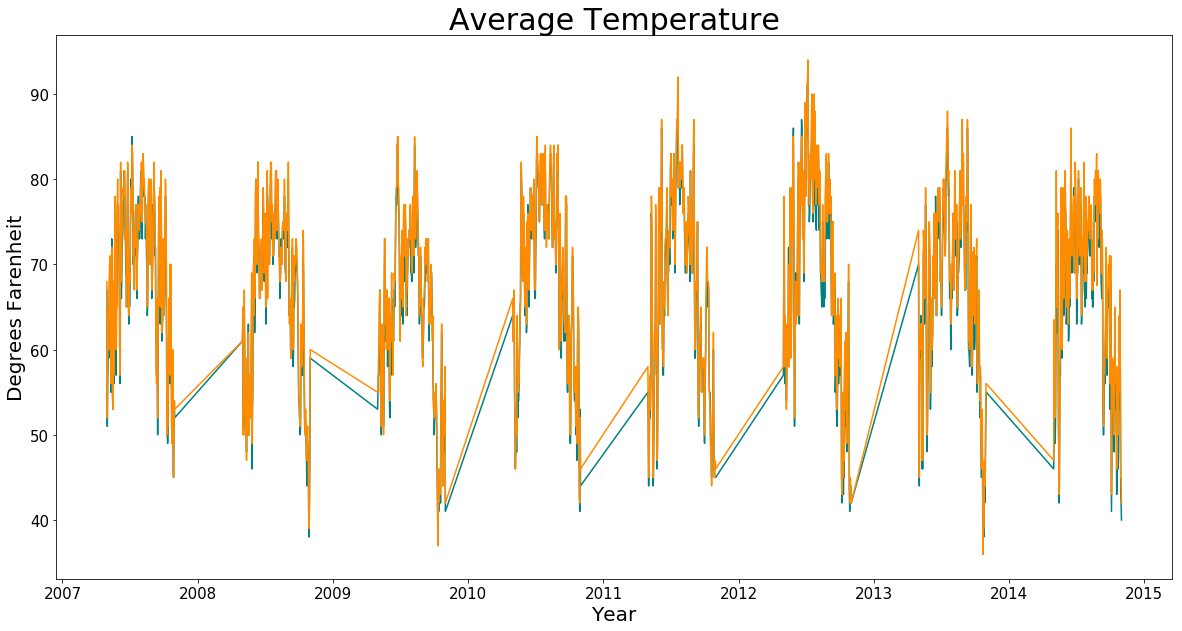

In [15]:
plt.figure(figsize=(20,10))

plt.plot(weather[weather['Station']==1]['Tavg'], color="teal")
plt.plot(weather[weather['Station']==2]['Tavg'], color="darkorange")
plt.title("Average Temperature", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Degrees Farenheit", fontsize=20)
plt.xlabel("Year", fontsize=20);

We knew we had some duplicates above. We'll look at `weather[weather.values=="M"].drop_duplicates()` and fill in whatever is empty using the other station.

In [16]:
weather.loc['2009-06-26','WetBulb'] = 67
weather.loc['2009-06-18', 'SeaLevel'] = 29.79
weather.loc['2009-06-26', 'StnPressure'] = 29.20
weather.loc['2013-08-10', 'WetBulb'] = 63
weather.loc['2013-08-11', 'WetBulb'] = 64
weather.loc['2013-08-10', 'StnPressure'] = 29.30

There are some extra left over, and it seems like most are from `Station_2`. Let's stick with only `Station_1` and fill it anything else that remains.

In [17]:
weather = weather[weather['Station'] == 1]

In [18]:
weather[weather.values=='M']['Station'].value_counts()

1    4
Name: Station, dtype: int64

Let's fill in that last `'M'`.

In [19]:
weather['SeaLevel'].replace('M', 0, inplace=True)

In [20]:
weather.dtypes

Station          int64
Tmax             int64
Tmin             int64
Tavg           float64
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

There are a few `0's` and weird values remaining (like `'  T'`). So let's get rid of those. Then we can cast whatever else needs to be casted so we can model with this dataset.

In [21]:
weather['WetBulb'] = weather['WetBulb'].astype(int)
weather['SeaLevel'] = weather['SeaLevel'].astype(float)

In [22]:
weather['SeaLevel'].replace(0, np.mean(weather['SeaLevel']), inplace=True)
weather['PrecipTotal'].replace('  T', '0', inplace=True)

In [23]:
weather[['Heat', 'Cool', 'PrecipTotal','StnPressure','AvgSpeed']] = weather[['Heat', 
        'Cool', 'PrecipTotal', 'StnPressure', 'AvgSpeed']].apply(pd.to_numeric)

In [24]:
weather.dtypes

Station          int64
Tmax             int64
Tmin             int64
Tavg           float64
DewPoint         int64
WetBulb          int32
Heat             int64
Cool             int64
PrecipTotal    float64
StnPressure    float64
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed       float64
dtype: object

Everything looks cleaned and useable now. We'll export and start combining our weather data with our train(trap) data.

We want to quickly look at a few 

In [25]:
weather.to_csv('../data/weather_cleaned.csv')